In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [3]:
Material = "copper"
filename = Material + "_fl_"
Df = pd.DataFrame()
for i in ["02", "03", "04", "06", "u"]:
    Data = pd.read_csv(filename + i + ".csv", delimiter = ",", header = None)
    Df[Material + i + "_time"] = Data[0]
    Df[Material + i + "_axis"] = Data[2]
    Df[Material + i + "_acceleration"] =Data[3]
Df = Df.dropna() #Makes sure they have run for equal amount of time


In [4]:
def linfunc(x, a, b):
    return a*x + b

In [5]:
results = pd.DataFrame()
for axis in range(3):
    AvgAcc, FlowRate = [], []
    AxisDf = Df[Df[Material + "02_axis"]  == axis]

    for i in ["02", "03", "04", "06"]:
        AvgAcc.append(AxisDf[Material + i + "_acceleration"].mean())
        FlowRate.append(int(i))

    par, cov = curve_fit(linfunc, FlowRate, AvgAcc)

    Xfit = np.linspace(0, 10, 1000)
    Yfit = linfunc(Xfit, *par)

    r2score = r2_score(AvgAcc, linfunc(np.asarray(FlowRate), *par))

    results["Material"] = Material
    results["R2_score"] = r2_score
    
    # plt.plot(Xfit, Yfit)


    # plt.plot(FlowRate, AvgAcc, label = filename + f"axis={axis}, $R^2 =$ {r2score:.2f}")
    # plt.xlabel("Flow Rate $[m^3/h]$")
    # plt.ylabel("Average Acceleration")
    # plt.legend()
    # plt.show()


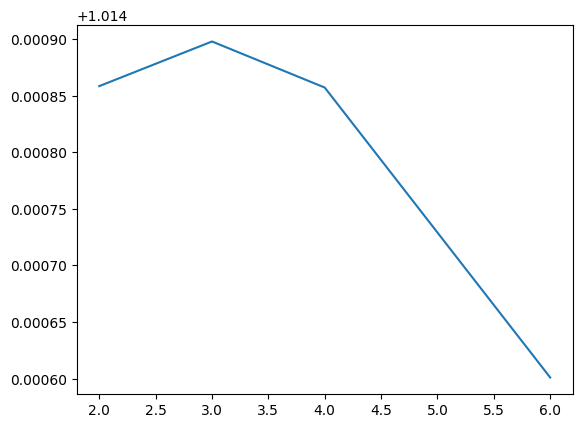

In [6]:
plt.plot(FlowRate, AvgAcc, label = filename + f"axis={axis}, $R^2 =$ {r2score:.2f}")